In [2]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pylab as pl
from IPython import display
import time
from matplotlib import animation
from mpl_toolkits import mplot3d
%matplotlib inline
plt.style.use('ggplot')
from pylab import figure, subplot, hist, xlim, show
import psycopg2


In [3]:
def extractWordCounInContrib( groupData ):
    group = groupData 
    group1_1 = pd.DataFrame(group['message'])
    group1M_List=group1_1['message'].tolist()

    wordCount = []
    for x in group1M_List:
        if (pd.isnull(x )):
            text=0
        else:
            x = str(x)
            text = len(x.split())
        
        wordCount.append(text) 

   
    group["Word Count"]= wordCount 

    return group

In [4]:
def getDataFromDatabase(groupName):
    conn = psycopg2.connect(database="dcr579jl1mh56g", user = "tcuceyhvgqlejy", password = "2c8288a367bdc38450e89d9fc17b8f1319fac07c140f6bbb5f5339ee7ff984d5", host = "ec2-54-83-22-244.compute-1.amazonaws.com", port = "5432")

    #print "Opened database successfully"

    cur = conn.cursor()

    cur.execute("SELECT * from "+groupName)
    df = pd.DataFrame(cur.fetchall())
    df.columns = ['id', 'message', 'time', 'username']
    #df.columns = cur.keys()
    #rows = cur.fetchall()
    #print "Operation done successfully";
    conn.close()
    
    df2 = extractWordCounInContrib(df)
    return df2


In [5]:
group1_1 = getDataFromDatabase("s4group3")
group2_1 = getDataFromDatabase("s4group4")
group3_1 = getDataFromDatabase("s4group5")
group4_1 = getDataFromDatabase("s4group6")
group5_1 = getDataFromDatabase("s4group7")
group6_1 = getDataFromDatabase("s4group8")
group7_1 = getDataFromDatabase("s4group9")
group8_1 = getDataFromDatabase("s4group10")
group9_1 = getDataFromDatabase("s4group12")
group10_1 = getDataFromDatabase("s4group15")

In [6]:
def getGiniCoef(group, memList):
    #for a group of 4 members
    #We capture contribution of each of the members
    g_m1=group.loc[group['username'] == memList[0]]
    g_m2=group.loc[group['username'] == memList[1]]
    g_m3=group.loc[group['username'] == memList[2]]
    g_m4=group.loc[group['username'] == memList[3]]
    
    contM1 =g_m1.shape[0]
    contM2 =g_m2.shape[0]
    contM3 =g_m3.shape[0]
    contM4 =g_m4.shape[0]
    
    
    #A list of contribution count by each member of the group
    grpWC= [contM1, contM2, contM3, contM4]
    
    #Mean of members contrubtion
    grpMean = np.mean(grpWC)
    summ=0
    #Caclute gini coeficient measure of symmetry of contributions within group
    for i in grpWC:
        n=grpWC.index(i)+1    
        for j in grpWC[n:]:
            summ+=abs(i-j)
            
    GiniCoefMeasure = summ/(2*(len(grpWC)**2)*grpMean)
    
    return  GiniCoefMeasure


In [7]:
def calGiniCoefAllGrps(grpList, allGrpMem):
    giniCof1 = getGiniCoef(grpList[0], allGrpMem[0]) 
    giniCof2= getGiniCoef(grpList[1], allGrpMem[1])
    giniCof3= getGiniCoef(grpList[2], allGrpMem[2])
    giniCof4= getGiniCoef(grpList[3], allGrpMem[3])
    giniCof5 = getGiniCoef(grpList[4], allGrpMem[4]) 
    giniCof6= getGiniCoef(grpList[5], allGrpMem[5])
    giniCof7= getGiniCoef(grpList[6], allGrpMem[6])
    giniCof8= getGiniCoef(grpList[7], allGrpMem[7])
    giniCof9= getGiniCoef(grpList[8], allGrpMem[8])
    giniCof10= getGiniCoef(grpList[9], allGrpMem[9])

    #giniCof5= getGiniCoef(grpList[4], allGrpMem[4])
    
    return giniCof1,giniCof2,giniCof3,giniCof4,giniCof5,giniCof6,giniCof7,giniCof8,giniCof9,giniCof10  


In [8]:
def medianWordCount(group, memList):
    
    g_m1=group.loc[group['username'] == memList[0]]
    g_m2=group.loc[group['username'] == memList[1]]
    g_m3=group.loc[group['username'] == memList[2]]
    g_m4=group.loc[group['username'] == memList[3]]
        
    g_m1WC = g_m1['Word Count'].tolist()
    g_m2WC = g_m2['Word Count'].tolist()
    g_m3WC = g_m3['Word Count'].tolist()
    g_m4WC = g_m4['Word Count'].tolist()
    
    m1WC = sum(g_m1WC)
    m2WC = sum(g_m2WC)
    m3WC = sum(g_m3WC)
    m4WC = sum(g_m4WC)
    
    grpMWC= [m1WC,m2WC, m3WC, m4WC]
    
    
    return  median(grpMWC)



In [9]:
def calMedianWordCount4AllGrps(grList,allGpMem):
        
        grp1 = medianWordCount(grList[0], allGpMem[0])
        grp2 = medianWordCount(grList[1], allGpMem[1])
        grp3 = medianWordCount(grList[2], allGpMem[2])
        grp4 = medianWordCount(grList[3], allGpMem[3])
        grp5 = medianWordCount(grList[4], allGpMem[4])
        grp6 = medianWordCount(grList[5], allGpMem[5])
        grp7 = medianWordCount(grList[6], allGpMem[6])
        grp8 = medianWordCount(grList[7], allGpMem[7])
        grp9 = medianWordCount(grList[8], allGpMem[8])
        grp10 = medianWordCount(grList[9], allGpMem[9])
        #grp5 = medianWordCount(grList[4], allGpMem[4])
        
        return grp1,grp2,grp3,grp4,grp5,grp6,grp7,grp8,grp9,grp10    


In [10]:
def calColabLevel(grList,allGpMem):
    gCGrp1,gCGrp2,gCGrp3,gCGrp4,gCGrp5,gCGrp6,gCGrp7,gCGrp8,gCGrp9,gCGrp10=calGiniCoefAllGrps(grList, allGpMem)
    
    mWCGrp1,mWCGrp2,mWCGrp3,mWCGrp4,mWCGrp5,mWCGrp6,mWCGrp7,mWCGrp8,mWCGrp9,mWCGrp10=calMedianWordCount4AllGrps(grList,allGpMem)
   
       
    colabGrp1= mWCGrp1/gCGrp1
    colabGrp2= mWCGrp2/gCGrp2
    colabGrp3= mWCGrp3/gCGrp3
    colabGrp4= mWCGrp4/gCGrp4
    colabGrp5= mWCGrp5/gCGrp5
    colabGrp6= mWCGrp6/gCGrp6
    colabGrp7= mWCGrp7/gCGrp7
    colabGrp8= mWCGrp8/gCGrp8
    colabGrp9= mWCGrp9/gCGrp9
    colabGrp10= mWCGrp10/gCGrp10
    
    #colabGrp5= mWCGrp5/gCGrp5
    
    return colabGrp1,colabGrp2,colabGrp3,colabGrp4,colabGrp5,colabGrp6,colabGrp7,colabGrp8,colabGrp9,colabGrp10  


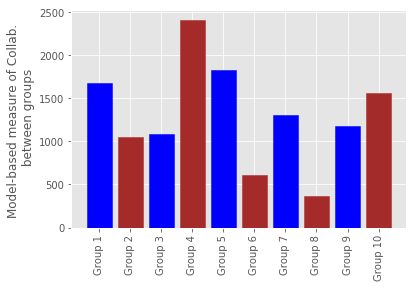

In [15]:
fig = plt.figure()
def plotcolabLevel(grList,allGpMem):
        
        Cgrp1,Cgrp2,Cgrp3,Cgrp4,Cgrp5,Cgrp6,Cgrp7,Cgrp8,Cgrp9,Cgrp10= calColabLevel(grList,allGpMem)
        

        x = ['Group 1', 'Group 2', 'Group 3', 'Group 4','Group 5', 'Group 6', 'Group 7', 'Group 8','Group 9', 'Group 10']
        grpL=[Cgrp1,Cgrp2,Cgrp3,Cgrp4,Cgrp5,Cgrp6,Cgrp7,Cgrp8,Cgrp9,Cgrp10]
        x_pos = [j for j, _ in enumerate(grpL)]
        
        N = 10
        ind = np.arange(N) 
        width = 0.1  
        

        #lt.subplot(2, 1, 1) 
        barList= plt.bar(x_pos, grpL)
        barList[0].set_color('#0000FF')
        barList[1].set_color('#A52A2A')
        barList[2].set_color('#0000FF')
        barList[3].set_color('#A52A2A') 
        barList[4].set_color('#0000FF')
        barList[5].set_color('#A52A2A')
        barList[6].set_color('#0000FF')
        barList[7].set_color('#A52A2A')
        barList[8].set_color('#0000FF')
        barList[9].set_color('#A52A2A')
        #barList[4].set_color('black')
        #plt.xlabel("Groups")
        plt.ylabel("Model-based measure of Collab. \n between groups")
        #plt.title("Between-groups measure of colabo. &\n Within-group measure of contrib.")
        plt.xticks(x_pos, x, rotation='vertical')
        
        
        plt.savefig('C:/Users/User/Desktop/NewStudy/measureOfColabBtwnGrps.jpg')
        plt.legend(loc='best')
        
        plt.show()    
   


#MemberList in groups 1-4
m1List = ['cls409','cls410', 'cls411',  'cls412']
m2List = ['cls413', 'cls414', 'cls415', 'cls416']
m3List = ['cls417','cls418', 'cls419', 'cls420']
m4List = ['cls421', 'cls422', 'cls423', 'cls424']
m5List = ['cls425','cls426', 'cls427',  'cls428']
m6List = ['cls429', 'cls430', 'cls431', 'cls432']
m7List = ['cls433','cls434', 'cls435', 'cls436']
m8List = ['cls437', 'cls438', 'cls439', 'cls440']
m9List = ['cls445','cls446', 'cls447', 'cls448']
m10List = ['cls457', 'cls458', 'cls459', 'cls460']

all4gMem = [m1List, m2List, m3List, m4List, m5List, m6List, m7List, m8List, m9List, m10List]
allGrps = [group1_1, group2_1, group3_1, group4_1, group5_1, group6_1, group7_1, group8_1, group9_1, group10_1]

#plotGroupAtTimeIntevals(allGrps,all4gMem, 1)
 
plotcolabLevel(allGrps, all4gMem)